In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(0)

## Inconsistency

### Good instrument

We begin by simulating an instrument Z with a strong association with the endogenous variable X and demonstrating that a strong instrument compensates for it's weak association with the common exogenous variable A by the formula given in Equation 4.

In [11]:
def simulate_good_instrument(n):
    # Simulate an instrument Z with a weak association with the common exogenous variable A but with a strong association with
    # the endogenous variable X.
    Z = np.random.normal(0, 1, n)
    A = np.random.normal(0, 1, n) + 0.1 * Z
    X = np.random.normal(0, 1, n) + 5 * Z + 2*A
    Y = np.random.normal(0, 1, n) + 2 * X + 2*A
    return(Z.reshape(-1,1), A.reshape(-1,1), X.reshape(-1,1), Y.reshape(-1,1))

In [12]:
(Z1, A1, X1, Y1) = simulate_good_instrument(20000000) # Large n to demonstrate asymptotic behaviour
lr1 = LinearRegression() # OLS regression
lr1.fit(X1, Y1)
b_ols_str = lr1.coef_[0][0] # OLS estimate for a strong instrument
print("OLS estimate: ", b_ols_str)

OLS estimate:  2.157240219877924


In [13]:
lr2 = LinearRegression() # First stage OLS regression
lr2.fit(Z1, X1)
X_hat1 = lr2.predict(Z1)
lr3 = LinearRegression() # Second stage OLS regression
lr3.fit(X_hat1, Y1)
R2_str = np.var(X_hat1) / np.var(X1)
b_2sls_str = lr3.coef_[0][0] # 2SLS estimate for a strong instrument
print("R^2: ", R2_str)
print("2SLS estimate: ", b_2sls_str)

R^2:  0.8439147458791253
2SLS estimate:  2.038347115235956


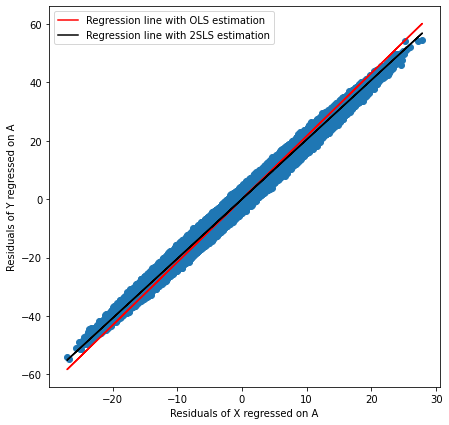

In [16]:
# Residuals from regression of Y against A
Y_lr = LinearRegression()
Y_lr.fit(A1, Y1)
Y_res = Y1 - Y_lr.predict(A1)

# Residuals from regression of X against A
X_lr = LinearRegression()
X_lr.fit(A1, X1)
X_res = X1 - X_lr.predict(A1)

# Plot the Y residuals against X residuals
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.scatter(X_res, Y_res)

# Plot the regression line obtained with OLS estimation
ax.plot(X_res, b_ols_str * X_res, color='r', label='Regression line with OLS estimation')

# Plot the regression line obtained with 2SLS estimation
ax.plot(X_res, b_2sls_str * X_res, color='k', label='Regression line with 2SLS estimation')

# Axes and legend
ax.set_xlabel('Residuals of X regressed on A')
ax.set_ylabel('Residuals of Y regressed on A')
ax.legend()

### Weak instrument

We now simulate the same system but with a much weaker association between Z and X, to demonstrate that IV estimation suffers significant inconsistency when using weak instruments.

In [8]:
def simulate_weak_instrument(n):
    # Simulate an instrument Z with a weak association with the common exogenous variable A but with a strong association with
    # the endogenous variable X.
    Z = np.random.normal(0, 1, n)
    A = np.random.normal(0, 1, n) + 0.1 * Z
    X = np.random.normal(0, 1, n) + 0.1 * Z + 2*A
    Y = np.random.normal(0, 1, n) + 2 * X + 2*A
    return(Z.reshape(-1,1), A.reshape(-1,1), X.reshape(-1,1), Y.reshape(-1,1))   

In [9]:
(Z2, A2, X2, Y2) = simulate_weak_instrument(20000000) # Large n to demonstrate asymptotic behaviour
lr4 = LinearRegression() # OLS regression
lr4.fit(X2, Y2)
b_ols_wk = lr4.coef_[0][0]
print('OLS estimate', b_ols_wk)

OLS estimate 2.797951849160839


In [10]:
lr5 = LinearRegression() # First stage OLS regression
lr5.fit(Z2.reshape(-1, 1), X2)
X_hat2 = lr5.predict(Z2)
lr6 = LinearRegression() # Second stage OLS regression
lr6.fit(X_hat2, Y2)
R2_wk = np.var(X_hat2) / np.var(X2)
b_2sls_wk = lr6.coef_[0][0] # 2SLS estimate for a strong instrument
print("R^2: ", R2_wk)
print("2SLS estimate: ", b_2sls_wk)

R^2:  0.017534628214620478
2SLS estimate:  2.667176027650846


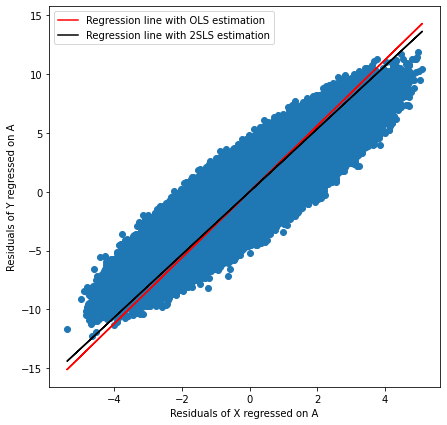

In [17]:
# Residuals from regression of Y against A
Y_lr = LinearRegression()
Y_lr.fit(A2, Y2)
Y_res = Y2 - Y_lr.predict(A2)

# Residuals from regression of X against A
X_lr = LinearRegression()
X_lr.fit(A2, X2)
X_res = X2 - X_lr.predict(A2)

# Plot the Y residuals against X residuals
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.scatter(X_res, Y_res)

# Plot the regression line obtained with OLS estimation
ax.plot(X_res, b_ols_wk * X_res, color='r', label='Regression line with OLS estimation')

# Plot the regression line obtained with 2SLS estimation
ax.plot(X_res, b_2sls_wk * X_res, color='k', label='Regression line with 2SLS estimation')

# Axes and legend
ax.set_xlabel('Residuals of X regressed on A')
ax.set_ylabel('Residuals of Y regressed on A')
ax.legend()

## Finite-sample bias

In [9]:
def simulate_finite_sample(n):
    # Simulate an instrument Z with a weak association with the common exogenous variable A but with a strong association with
    # the endogenous variable X.
    Z = np.random.normal(0, 1, n)
    A = np.random.normal(0, 1, n)
    X = np.random.normal(0, 1, n) + 0.1 * Z + 2*A
    Y = np.random.normal(0, 1, n) + 2 * X + 2*A
    return(Z.reshape(-1,1), A.reshape(-1,1), X.reshape(-1,1), Y.reshape(-1,1))

In [10]:
(Z3, A3, X3, Y3) = simulate_finite_sample(2000)
lr7 = LinearRegression() # OLS regression
lr7.fit(X3, Y3)
b_ols_fin = lr7.coef_[0][0] # OLS estimate for a strong instrument
print("OLS estimate: ", b_ols_fin)

OLS estimate:  2.8009957847974682


In [11]:
lr8 = LinearRegression() # First stage OLS regression
lr8.fit(Z3, X3)
X_hat3 = lr8.predict(Z3)
lr8 = LinearRegression() # Second stage OLS regression
lr8.fit(X_hat3, Y3)
b_2sls_fin = lr8.coef_[0][0] # 2SLS estimate for a strong instrument
print("2SLS estimate: ", b_2sls_fin)

2SLS estimate:  2.2118850273132846
